In [15]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [16]:
city_name_data = pd.read_csv('sgb128_name.csv',header=None)
city_dist_data = pd.read_csv('sgb128_dist.csv',header=None)
city_weight_data = pd.read_csv('sgb128_weight.csv',header=None)
# city_length = 25

In [17]:
class City:
    def __init__(self,name,population):
        self.name=name
        self.population=population
    
    def distance(self, city):
        distance=city_dist_data.iloc[self.name,city.name]
        return distance
    
    def __repr__(self):
        return "\""+str(city_name_data.iloc[self.name,0]) +"["+str(self.population)+"]"+"\""

In [18]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
        self.total_population= 0
    
    def routeDistance(self):
        pathDistance = 0
        for i in range(0, len(self.route)):
            fromCity = self.route[i]
            toCity = None
            if i + 1 < len(self.route):
                toCity = self.route[i + 1]
            else:
                break
            pathDistance += fromCity.distance(toCity)
        self.distance = pathDistance
        return self.distance
    
    def routePopulation(self):
        path_population = 0
        for i in range(0, len(self.route)):
            City = self.route[i]
            path_population += City.population
        self.total_population = path_population
        return self.total_population
    
    def routeFitness(self):
        if self.fitness == 0:
          self.fitness = self.routePopulation() / float(self.routeDistance()) 
        return self.fitness

In [19]:
def createRoute(cityList):
    route = random.sample(cityList, 10)
    return route
    
def initialPopulation(popSize, cityList):
    population = []
    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [20]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [21]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [22]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [23]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
    for item in parent2:
      if item not in childP1 and len(childP1)<10:
        childP1.append(item)
    child = childP1
    return child

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [24]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual
    
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [25]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [26]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(Fitness(pop[rankRoutes(pop)[0][0]]).routeDistance()))
    print("Initial population: " + str(Fitness(pop[rankRoutes(pop)[0][0]]).routePopulation()))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)

    total_distance=0
    total_population=0
    for i in range (0,10):
        bestRouteIndex = rankRoutes(pop)[i][0]
        bestRoute = pop[bestRouteIndex]
        fitness = Fitness(bestRoute)
        fitness.routeFitness()
        print((i+1),"route:", bestRoute)
        total_distance += fitness.distance
        print("distance: " + str(fitness.distance))
        total_population += fitness.total_population
        print("Population: " + str(fitness.total_population))

    print("Total distance= "+ str(total_distance))
    print("Total population= " + str(total_population))
    return bestRoute

In [27]:
# cityList = []
# len(cities.City)
# for i in range(0,len(cities.City)):
#     cityList.append(City(name=cities.City.iloc[i],population=cities.Population.iloc[i],has_petrol=cities.Has_petrol.iloc[i]))

cityList = []
for i in range(0,len(city_name_data)):
    cityList.append(City(name=i,population=city_weight_data.iloc[i,0]))


In [28]:

geneticAlgorithm(population=cityList, popSize=600, eliteSize=20, mutationRate=0.15, generations=100)


Initial distance: 8587
Initial population: 3114379
1 route: ["Saint Louis, MO[453085]", "San Jose, CA[629546]", "Worcester, MA[161799]", "San Diego, CA[875538]", "Ravenna, OH[11987]", "Winnipeg, MB[564473]", "Rochester, NY[241741]", "Toledo, OH[354635]", "Rockford, IL[139712]", "San Francisco, CA[678974]"]
distance: 3693
Population: 4111490
2 route: ["Washington, DC[638432]", "Winnipeg, MB[564473]", "Rochester, NY[241741]", "Saint Joseph, MO[76691]", "San Antonio, TX[786023]", "Rockford, IL[139712]", "Toledo, OH[354635]", "San Jose, CA[629546]", "Worcester, MA[161799]", "San Diego, CA[875538]"]
distance: 4098
Population: 4468590
3 route: ["Toronto, ON[599217]", "Rockford, IL[139712]", "San Antonio, TX[786023]", "Saint Louis, MO[453085]", "Worcester, MA[161799]", "San Jose, CA[629546]", "Toledo, OH[354635]", "Rochester, NY[241741]", "Seattle, WA[493846]", "San Diego, CA[875538]"]
distance: 4527
Population: 4735142
4 route: ["Seattle, WA[493846]", "Saint Louis, MO[453085]", "San Jose, CA

["San Diego, CA[875538]",
 "Worcester, MA[161799]",
 "San Jose, CA[629546]",
 "Seattle, WA[493846]",
 "Saint Louis, MO[453085]",
 "Toledo, OH[354635]",
 "Rochester, NY[241741]",
 "San Antonio, TX[786023]",
 "Rockford, IL[139712]",
 "Ravenna, OH[11987]"]

In [29]:
def geneticAlgorithmDistancePlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(Fitness(pop[rankRoutes(pop)[0][0]]).routeDistance())
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(Fitness(pop[rankRoutes(pop)[0][0]]).routeDistance())
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
def geneticAlgorithmPopulationPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(Fitness(pop[rankRoutes(pop)[0][0]]).routePopulation())
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(Fitness(pop[rankRoutes(pop)[0][0]]).routePopulation())
    
    plt.plot(progress)
    plt.ylabel('Population')
    plt.xlabel('Generation')
    plt.show()

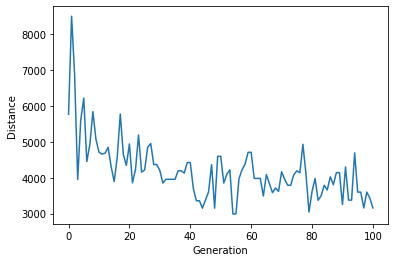

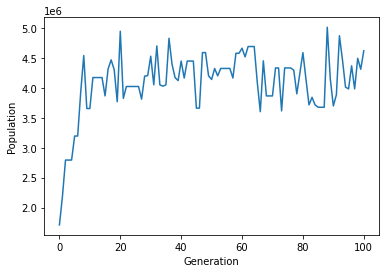

In [31]:

geneticAlgorithmDistancePlot(population=cityList, popSize=600, eliteSize=80, mutationRate=0.15, generations=100)
geneticAlgorithmPopulationPlot(population=cityList, popSize=600, eliteSize=80, mutationRate=0.15, generations=100)
